## Using the DFT

In [1]:
import cv2
# to install cv2 use: pip install opencv-python
import math
import matplotlib.pyplot as plt 
import numpy as np


In [2]:
fname = 'Images/pagode-noisy.png'
img = cv2.imread(fname,cv2.IMREAD_GRAYSCALE)
print('Image Shape =', img.shape)

Image Shape = (872, 1164)


In [3]:
# convert the image representation to SPFP
img_float32 = np.float32(img)

In [4]:
# compute the DFT
# Note that the computed DFT has 2 channels :
# dft[:,:,0] - real values
# dft[:,:,1] - imaginary values
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
# recenter the DFT , such that the center is (0,0)
dft_shift = np.fft.fftshift(dft)

In [5]:
# compute the frequency spectrum
# module of the complex value
magnitude_spectrum = cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])
# compute the logarith of magnitude such that smaller values are visible
magnitude_spectrum = 20*np.log(magnitude_spectrum)


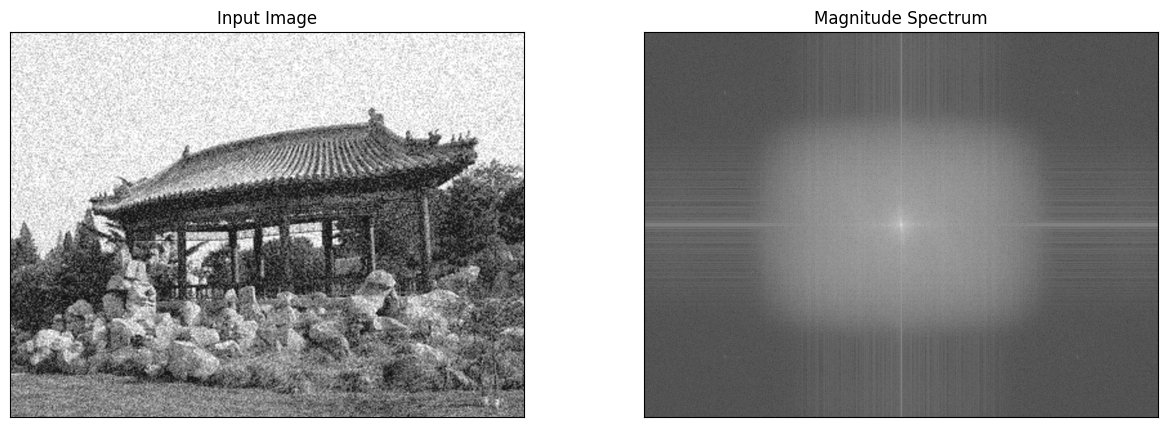

In [6]:
# display the image and the spectrum
fig = plt.figure(figsize=(15,5))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()         

### IDEAL LOW PASS FILTER (ILPF)

In [7]:
# manually filter high frequencies using our own ILPF
rows, cols = img.shape
crow, ccol = rows//2 , cols//2     # center

# create a mask first, center square is 1, remaining all zeros
ILPF_mask = np.zeros((rows, cols, 2), np.uint8)
# filter width and heigth
divider = 32
frows = rows//divider
fcols = cols//divider
ILPF_mask[crow-frows:crow+frows, ccol-fcols:ccol+fcols] = (1,1)
#ILPF_mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
dft_masked = dft_shift*ILPF_mask
# do not forget to undo the centering of the transform
dft_masked_ishift = np.fft.ifftshift(dft_masked)
img_back = cv2.idft(dft_masked_ishift)

# img_back should only have real values
# but let's make sure due to rounding and representation errors
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])


In [8]:
# compute the frequency spectrum of the MASKED_DFT, 
# just for display purposes
# module of the complex value
filtered_spectrum = cv2.magnitude(dft_masked[:,:,0],dft_masked[:,:,1])
# compute the logarith of magnitude such that smaller values are visible
filtered_spectrum = 20*np.log(filtered_spectrum+0.0001)
# compute the frequency spectrum of the MASK, 
# just for display purposes
# module of the complex value
mask_spectrum = np.sqrt(np.power(ILPF_mask[:,:,0],2)+np.power(ILPF_mask[:,:,1],2))
# compute the logarith of magnitude such that smaller values are visible
mask_spectrum = 20*np.log(mask_spectrum+0.0001)

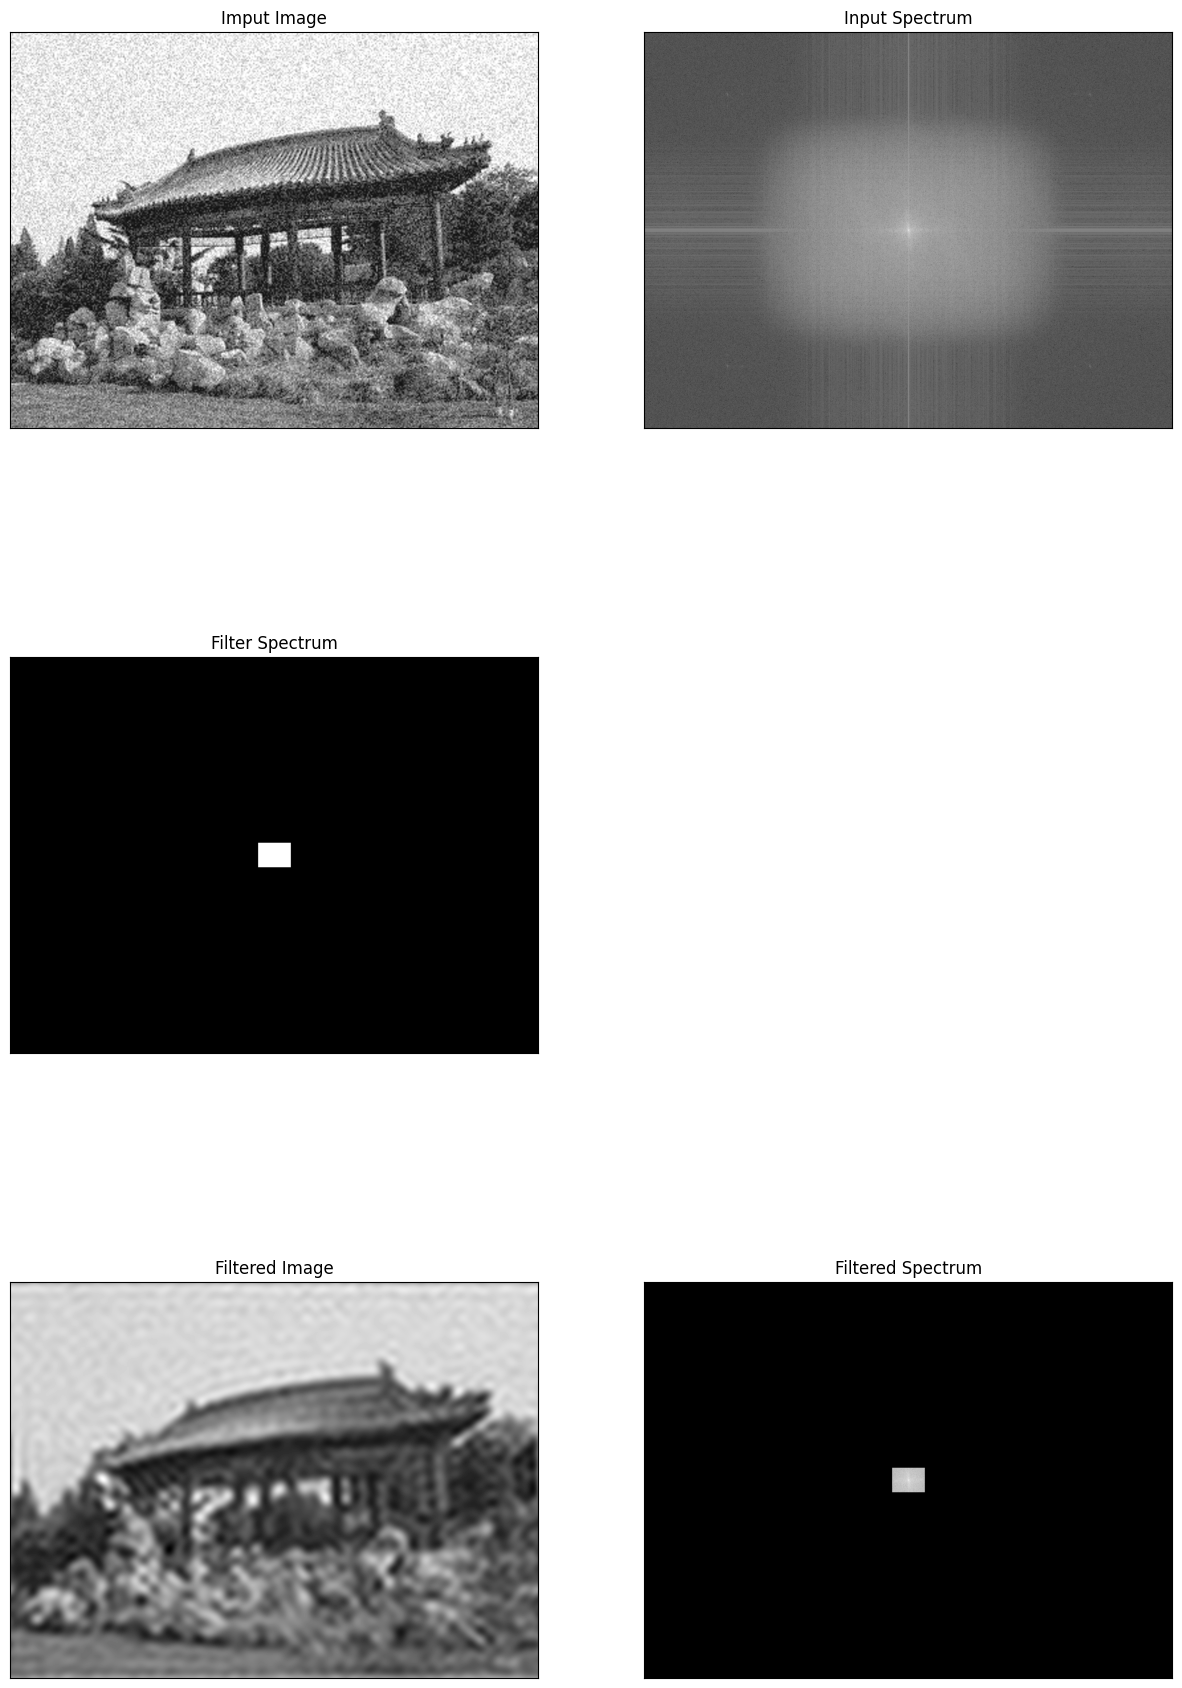

In [9]:
# display the image and the spectrum
fig = plt.figure(figsize=(15,23))
plt.subplot(321),plt.imshow(img, cmap = 'gray')
plt.title('Imput Image'), plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Input Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(323),plt.imshow(mask_spectrum, cmap = 'gray')
plt.title('Filter Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(325),plt.imshow(img_back, cmap = 'gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(326),plt.imshow(filtered_spectrum, cmap = 'gray')
plt.title('Filtered Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()         

### GAUSSIAN LOW PASS FILTER (GLPF)

In [10]:
def gaussian_filter(kernel_size, sigma=1, muu=0):
 
    # Initializing value of x,y as grid of kernel size
    # in the range of kernel size
 
    x, y = np.meshgrid(np.linspace(-1, 1, kernel_size),
                       np.linspace(-1, 1, kernel_size))
    dst = np.sqrt(x**2+y**2)
 
    # lower normal part of gaussian
    normal = 1/(2.0 * np.pi * sigma**2)
 
    # Calculating Gaussian filter
    gauss = np.exp(-((dst-muu)**2 / (2.0 * sigma**2))) * normal
    
    gauss = gauss / np.max(gauss)
    
    return gauss
 

# manually filter high frequencies using our own GLPF
kernel_size = 73
gaussF = gaussian_filter (kernel_size)

# create a mask first, given by the Gaussian
GLPF_mask = np.zeros((rows, cols, 2))
frows = kernel_size//2
fcols = kernel_size//2
GLPF_mask[crow-frows:crow+frows+1, ccol-fcols:ccol+fcols+1,0] = gaussF
GLPF_mask[crow-frows:crow+frows+1, ccol-fcols:ccol+fcols+1,1] = gaussF

# apply mask and inverse DFT
dft_masked = dft_shift*GLPF_mask
# do not forget to undo the centering of the transform
dft_masked_ishift = np.fft.ifftshift(dft_masked)
img_back = cv2.idft(dft_masked_ishift)

# img_back should only have real values
# but let's make sure due to rounding and representation errors
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

In [11]:
# compute the frequency spectrum of the MASKED_DFT, 
# just for display purposes
# module of the complex value
filtered_spectrum = cv2.magnitude(dft_masked[:,:,0],dft_masked[:,:,1])
# compute the logarith of magnitude such that smaller values are visible
filtered_spectrum = 20*np.log(filtered_spectrum+0.0001)
# compute the frequency spectrum of the MASK, 
# just for display purposes
# module of the complex value
mask_spectrum = np.sqrt(np.power(GLPF_mask[:,:,0],2)+np.power(GLPF_mask[:,:,1],2))
# compute the logarith of magnitude such that smaller values are visible
mask_spectrum = 20*np.log(mask_spectrum+0.0001)

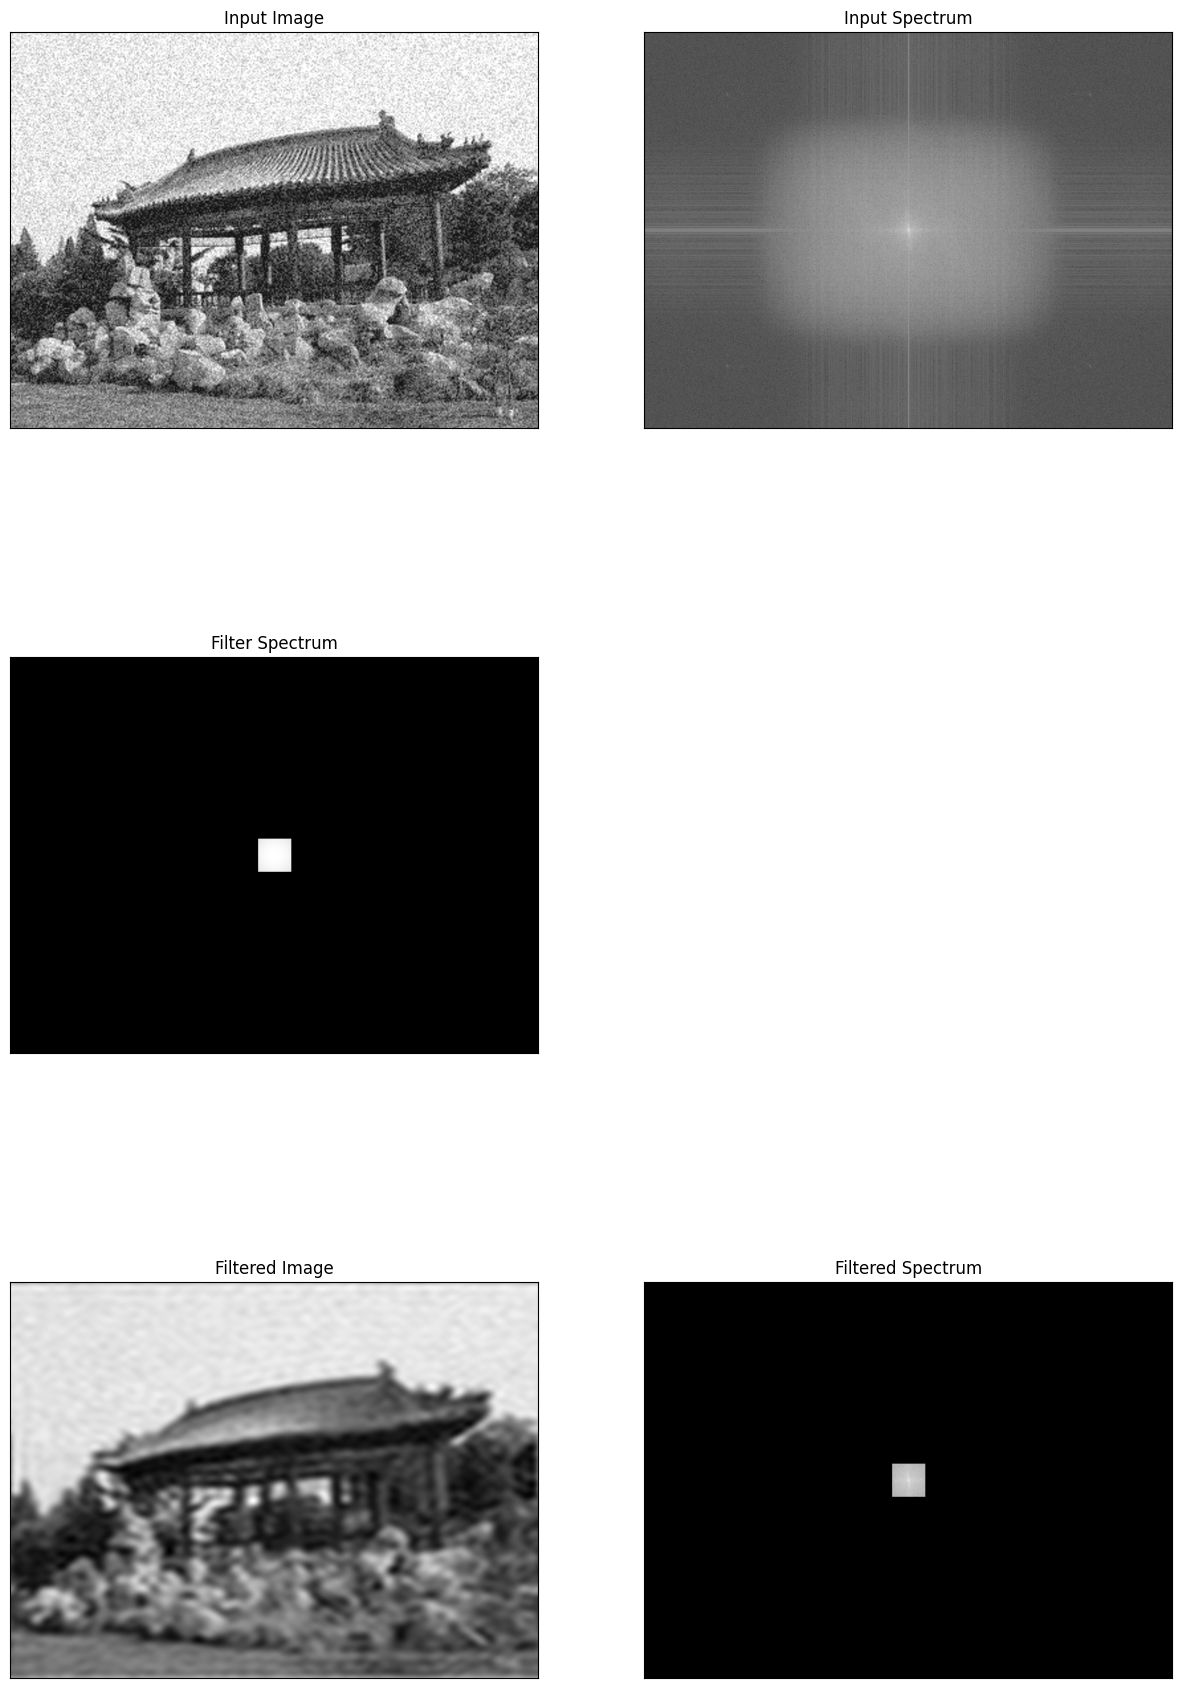

In [12]:
# display the image and the spectrum
fig = plt.figure(figsize=(15,23))
plt.subplot(321),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Input Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(323),plt.imshow(mask_spectrum, cmap = 'gray')
plt.title('Filter Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(325),plt.imshow(img_back, cmap = 'gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(326),plt.imshow(filtered_spectrum, cmap = 'gray')
plt.title('Filtered Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()         

### IDEAL HIGH PASS FILTER (IHPF)

In [13]:
# manually filter high frequencies using our own ILPF
rows, cols = img.shape
crow, ccol = rows//2 , cols//2     # center

# create a mask first, center square is 0, remaining all ones
IHPF_mask = np.ones((rows, cols, 2), np.uint8)
# build from ILPF_mask
IHPF_mask = 1 - ILPF_mask

# apply mask and inverse DFT
dft_masked = dft_shift*IHPF_mask
# do not forget to undo the centering of the transform
dft_masked_ishift = np.fft.ifftshift(dft_masked)
img_back = cv2.idft(dft_masked_ishift)

# img_back should only have real values
# but let's make sure due to rounding and representation errors
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

In [14]:
# compute the frequency spectrum of the MASKED_DFT, 
# just for display purposes
# module of the complex value
filtered_spectrum = cv2.magnitude(dft_masked[:,:,0],dft_masked[:,:,1])
# compute the logarith of magnitude such that smaller values are visible
filtered_spectrum = 20*np.log(filtered_spectrum+0.0001)
# compute the frequency spectrum of the MASK, 
# just for display purposes
# module of the complex value
mask_spectrum = np.sqrt(np.power(IHPF_mask[:,:,0],2)+np.power(IHPF_mask[:,:,1],2))
# compute the logarith of magnitude such that smaller values are visible
mask_spectrum = 20*np.log(mask_spectrum+0.0001)

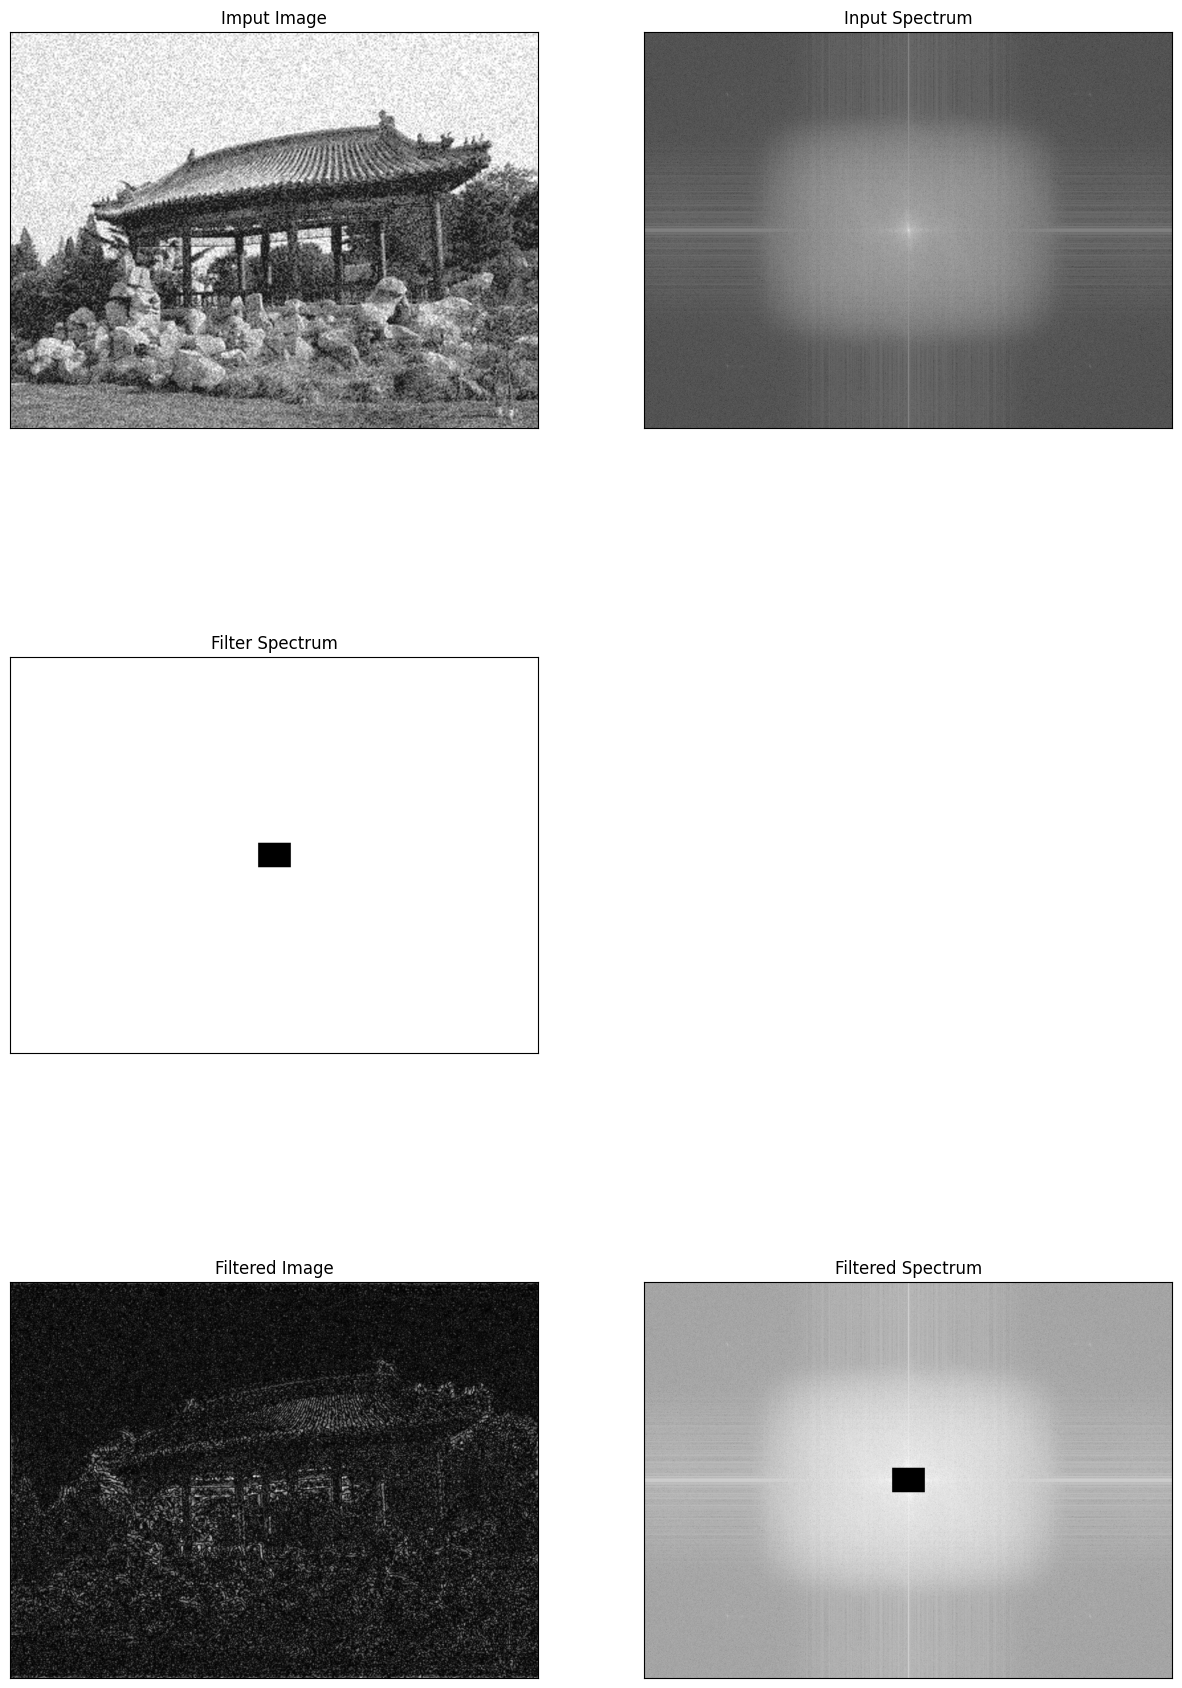

In [15]:
# display the image and the spectrum
fig = plt.figure(figsize=(15,23))
plt.subplot(321),plt.imshow(img, cmap = 'gray')
plt.title('Imput Image'), plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Input Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(323),plt.imshow(mask_spectrum, cmap = 'gray')
plt.title('Filter Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(325),plt.imshow(img_back, cmap = 'gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(326),plt.imshow(filtered_spectrum, cmap = 'gray')
plt.title('Filtered Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()         

### GAUSSIAN HIGH PASS FILTER (IHPF)

In [16]:
# manually filter high frequencies using our own GLPF


# create a mask first, center square is 0, remaining all ones
GHPF_mask = np.ones((rows, cols, 2), np.uint8)
# build from GLPF_mask
GHPF_mask = 1 - GLPF_mask

# apply mask and inverse DFT
dft_masked = dft_shift*GHPF_mask
# do not forget to undo the centering of the transform
dft_masked_ishift = np.fft.ifftshift(dft_masked)
img_back = cv2.idft(dft_masked_ishift)

# img_back should only have real values
# but let's make sure due to rounding and representation errors
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

In [17]:
# compute the frequency spectrum of the MASKED_DFT, 
# just for display purposes
# module of the complex value
filtered_spectrum = cv2.magnitude(dft_masked[:,:,0],dft_masked[:,:,1])
# compute the logarith of magnitude such that smaller values are visible
filtered_spectrum = 20*np.log(filtered_spectrum+0.0001)
# compute the frequency spectrum of the MASK, 
# just for display purposes
# module of the complex value
mask_spectrum = np.sqrt(np.power(GHPF_mask[:,:,0],2)+np.power(GHPF_mask[:,:,1],2))
# compute the logarith of magnitude such that smaller values are visible
mask_spectrum = 20*np.log(mask_spectrum+0.0001)

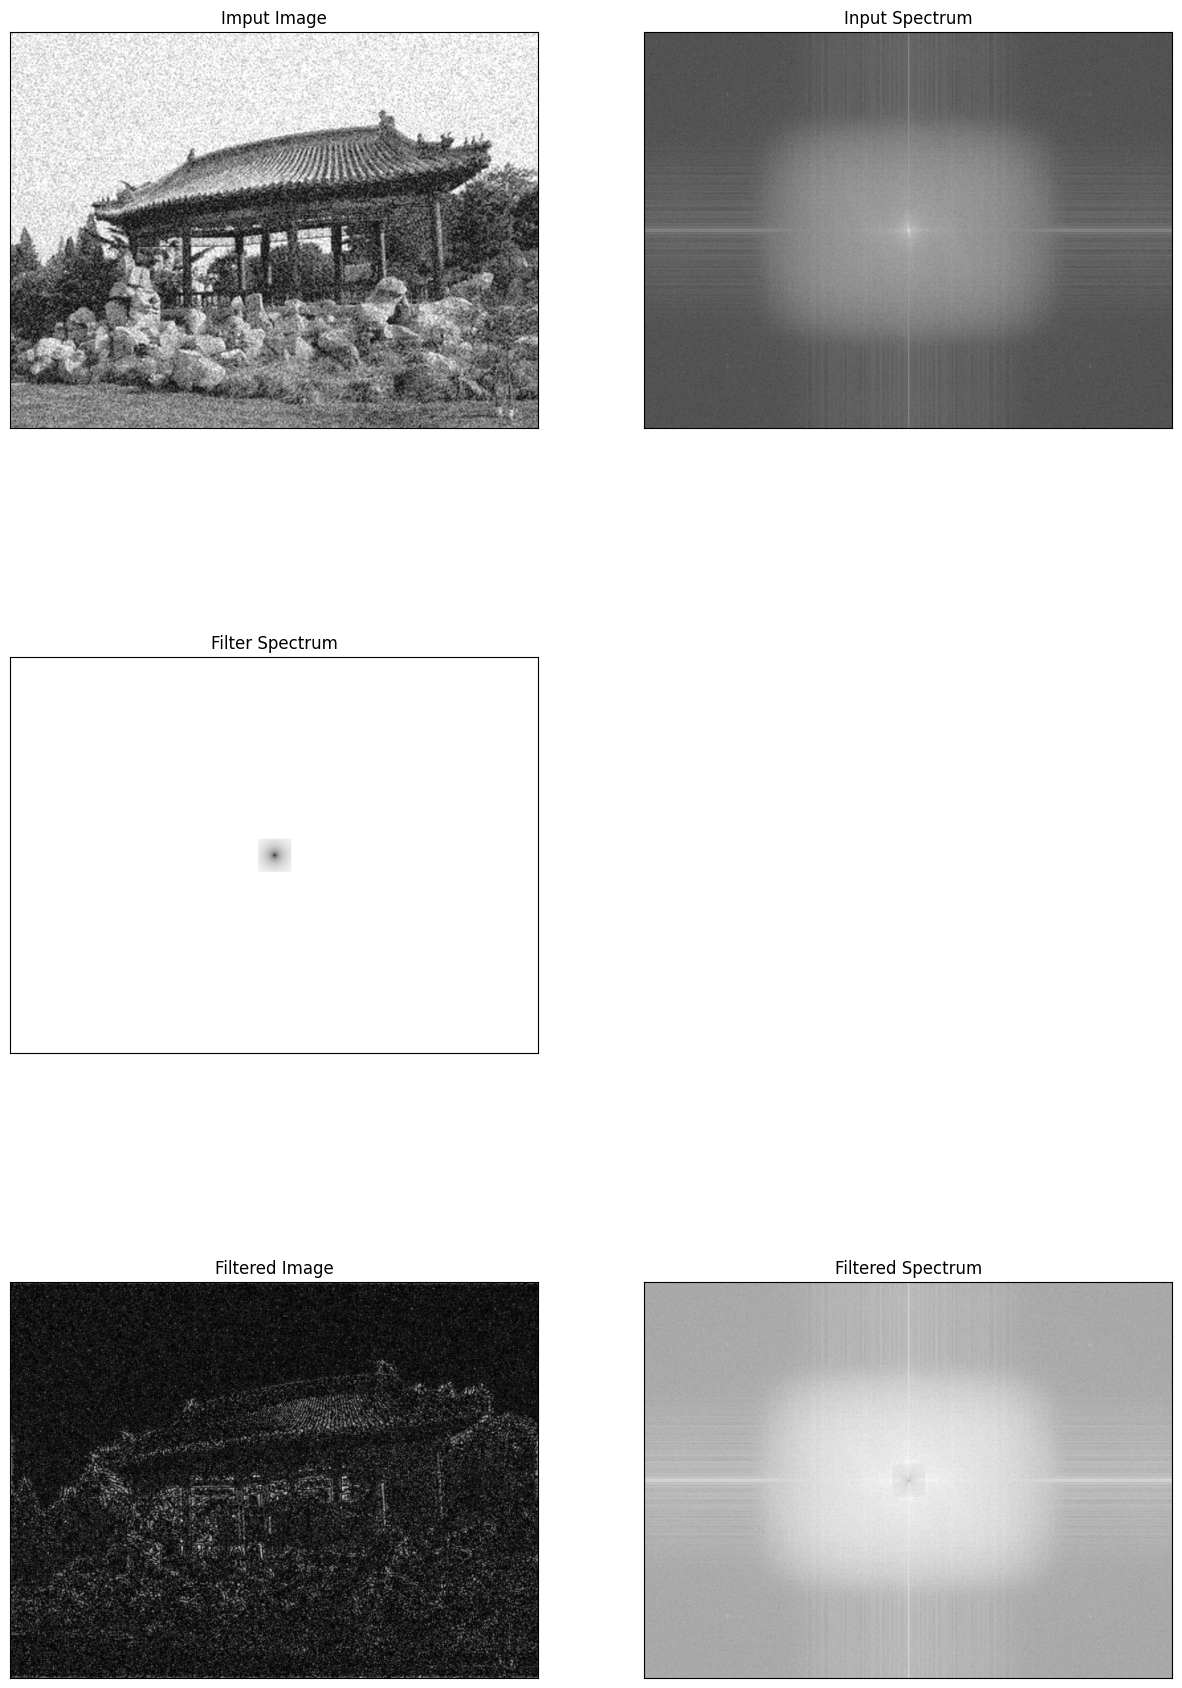

In [18]:
# display the image and the spectrum
fig = plt.figure(figsize=(15,23))
plt.subplot(321),plt.imshow(img, cmap = 'gray')
plt.title('Imput Image'), plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Input Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(323),plt.imshow(mask_spectrum, cmap = 'gray')
plt.title('Filter Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(325),plt.imshow(img_back, cmap = 'gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(326),plt.imshow(filtered_spectrum, cmap = 'gray')
plt.title('Filtered Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()         

In [19]:
#cv2.imwrite('Images/myImgFiltered.png',dImg)

In [20]:
print ("That's all, folks!")

That's all, folks!
